In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import csv
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.dates as dates
import matplotlib.ticker as mticker

In [5]:
#Combining JanMar16 Data
filenames = ["flightdata_jan16.csv","flightdata_feb16.csv","flightdata_mar16.csv"]
combined_csv = pd.concat( [ pd.read_csv(f) for f in filenames ] )
combined_csv.to_csv( "combined_csv.csv", index=False )

In [18]:
#Combined data JanMar16 cleanup
#combined_csv.dtypes
#combined_csv.head()
# Drop Columns not needed for analysis
combined_csv .drop(['Unnamed: 45', 'WHEELS_OFF','TAXI_OUT', 'WHEELS_ON', 'TAXI_IN','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID'], axis=1, inplace=True)
#Filter out multi-stop flight trips
combined_csv = combined_csv.loc[combined_csv["FLIGHTS"]==1 ,:]
#Seperate out state from Origin and Destination City
combined_csv['ORIGIN_CITY_NAME']=combined_csv['ORIGIN_CITY_NAME'].apply(lambda x: x.split(',')[0])
combined_csv['DEST_CITY_NAME']=combined_csv['DEST_CITY_NAME'].apply(lambda x: x.split(',')[0])
combined_csv.count()

In [19]:
#Export Combine JamMar16 file
combined_csv.to_csv( "janmar16.csv", index=False )

In [34]:
#Preparing Final csv from everyone to create 2016 data
filenames2 = ["janmar16.csv","aprjun16.csv","julsep16.csv","octdec16.csv"]
final_csv = pd.concat( [ pd.read_csv(f) for f in filenames2 ] )

In [35]:
#Export final 2016 csv file to local
final_csv.to_csv("final_csv.csv", index=False )

In [6]:
#Reading the Final 2016 contents to a dataframe
final_csv = pd.read_csv("final_csv.csv")
#final_csv.columns
final_csv.head()   

C:\Users\sujat\Anaconda3\envs\Pythondata\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
0,19790,249.0,0.0,NaN,0.0,2120.0,NaN,0.0,DL,NaN,...,1,NaN,DTW,11433,Detroit,MI,NaN,DL,NaN,2016
1,19790,92.0,0.0,NaN,0.0,2319.0,NaN,0.0,DL,NaN,...,1,NaN,ATL,10397,Atlanta,GA,NaN,DL,NaN,2016
2,19790,207.0,0.0,NaN,0.0,547.0,NaN,0.0,DL,NaN,...,1,NaN,LAX,12892,Los Angeles,CA,NaN,DL,NaN,2016
3,19790,173.0,0.0,NaN,0.0,2213.0,NaN,0.0,DL,NaN,...,1,NaN,SLC,14869,Salt Lake City,UT,NaN,DL,NaN,2016
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016


In [8]:
final_csv.columns

Index(['AIRLINE_ID', 'AIR_TIME', 'ARR_DEL15', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ARR_TIME', 'CANCELLATION_CODE', 'CANCELLED', 'CARRIER',
       'CARRIER_DELAY', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'DAY_OF_MONTH',
       'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_TIME',
       'DEST', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DISTANCE', 'DIVERTED', 'DIV_ACTUAL_ELAPSED_TIME',
       'DIV_AIRPORT_LANDINGS', 'DIV_ARR_DELAY', 'DIV_REACHED_DEST', 'FLIGHTS',
       'FL_DATE', 'FL_NUM', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'NAS_DELAY',
       'ORIGIN', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'SECURITY_DELAY', 'UNIQUE_CARRIER', 'WEATHER_DELAY', 'YEAR'],
      dtype='object')

In [9]:
#Total Flights by flight date
totflights_bydate = final_csv.groupby("FL_DATE",as_index=False)
totflights_bydate= totflights_bydate["FLIGHTS"].count()
totflights_bydate.head()

,FL_DATE,FLIGHTS
0,2016-01-01,13019
1,2016-01-02,14869
2,2016-01-03,15878
3,2016-01-04,15570
4,2016-01-05,14582


In [10]:
#Total Flights by flight month
totflights_bymonth = final_csv.groupby("MONTH",as_index=False)
totflights_bymonth= totflights_bymonth["FLIGHTS"].count()
totflights_bymonth.head()

,MONTH,FLIGHTS
0,1,445827
1,2,423889
2,3,479122
3,4,461630
4,5,958716


In [11]:
#Total Flights by flight day of week
totflights_bydayofweek = final_csv.groupby("DAY_OF_WEEK",as_index=False)
totflights_bydayofweek= totflights_bydayofweek["FLIGHTS"].count()
totflights_bydayofweek.head()

,DAY_OF_WEEK,FLIGHTS
0,1,909101
1,2,894053
2,3,888055
3,4,897552
4,5,914718


In [12]:
#Filtering by arrival delays > 15 minutes
final_arr_delays = final_csv.loc[final_csv["ARR_DEL15"] == 1 ,:]
final_arr_delays["FL_DATE"].head()

4     2016-01-01
5     2016-01-01
6     2016-01-01
45    2016-01-01
60    2016-01-01
Name: FL_DATE, dtype: object

In [13]:
#Temporal Analysis
#1.Month vs Arrival Delays
final_arr_delayed_bymonth = final_arr_delays.groupby("MONTH",as_index=False)
final_arr_delayed_bymonth  = final_arr_delayed_bymonth["FLIGHTS"].count()
final_arr_delayed_bymonth

,MONTH,FLIGHTS
0,1,70882
1,2,61680
2,3,82569
3,4,66607
4,5,150996
5,6,100361
6,7,113601
7,8,103421
8,9,63686
9,10,63470


In [14]:
#Temporal Analysis
#2.Flight Date vs Arrival Delays
final_arr_delayed_bydate = final_arr_delays.groupby("FL_DATE",as_index=False)
final_arr_delayed_bydate = final_arr_delayed_bydate["FLIGHTS"].count()
final_arr_delayed_bydate.head() 

,FL_DATE,FLIGHTS
0,2016-01-01,1667
1,2016-01-02,2291
2,2016-01-03,3612
3,2016-01-04,3231
4,2016-01-05,2838


In [15]:
#Temporal Analysis
#3.Day of week vs No. of Arrival Delays
final_arr_delayed_dayofweek = final_arr_delays.groupby("DAY_OF_WEEK",as_index=False)
final_arr_delayed_dayofweek  = final_arr_delayed_dayofweek["FLIGHTS"].count()
final_arr_delayed_dayofweek

,DAY_OF_WEEK,FLIGHTS
0,1,156426
1,2,142384
2,3,140671
3,4,173328
4,5,174618
5,6,107912
6,7,144398


In [16]:
#Filtering by arrival delays > 15 minutes
final_arr_delays = final_csv.loc[final_csv["ARR_DEL15"] == 1 ,:]
final_arr_delays["FL_DATE"].head()

4     2016-01-01
5     2016-01-01
6     2016-01-01
45    2016-01-01
60    2016-01-01
Name: FL_DATE, dtype: object

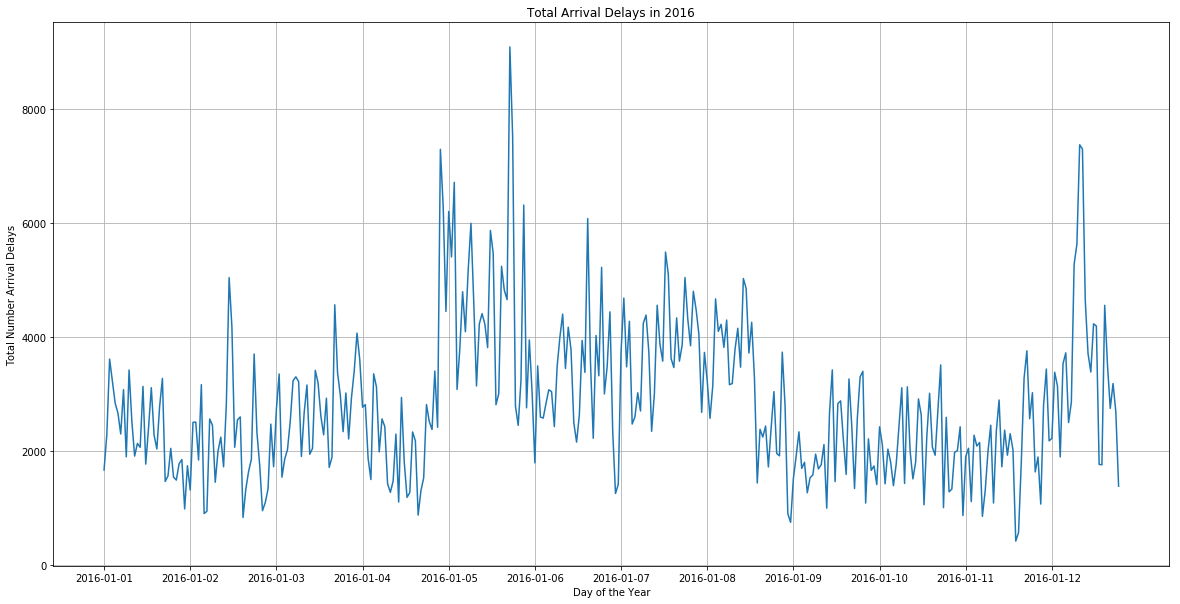

In [18]:
#Plt1.1: Temporal Analysis - Arrival FLight Delays vs Flight Date - Trends on number of delays through the year
plt.figure(figsize=(20,10))
plt.grid(b=True, linestyle='-')  
plt.xlabel("Day of the Year")
plt.ylabel("Total Number Arrival Delays")
plt.title("Total Arrival Delays in 2016")
plt.plot(final_arr_delayed_bydate["FL_DATE"],final_arr_delayed_bydate["FLIGHTS"])
plt.locator_params(axis='x', nbins=12)
plt.show()

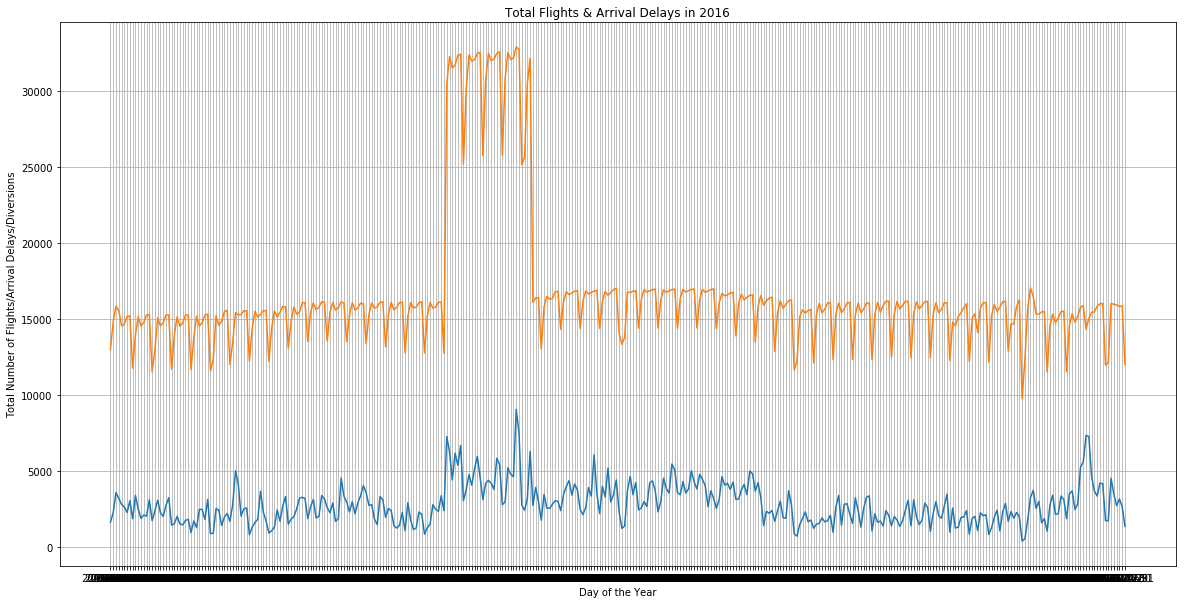

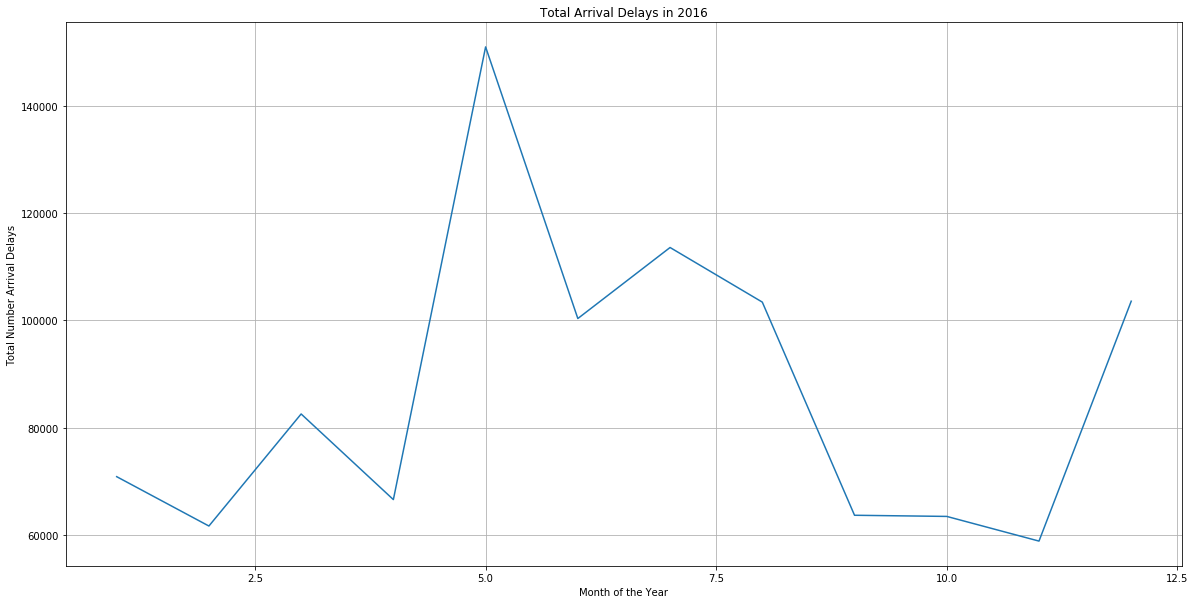

In [21]:
#Plt1.2: Temporal Analysis - Arrival FLight Delays vs Flight Month- Trends on number of delays through the year
plt.figure(figsize=(20,10))
plt.grid(b=True, linestyle='-')  
plt.xlabel("Month of the Year")
plt.ylabel("Total Number Arrival Delays")
plt.title("Total Arrival Delays in 2016")
plt.plot(final_arr_delayed_bymonth["MONTH"],final_arr_delayed_bymonth["FLIGHTS"])
plt.locator_params(axis='x', nbins=6)
plt.show()

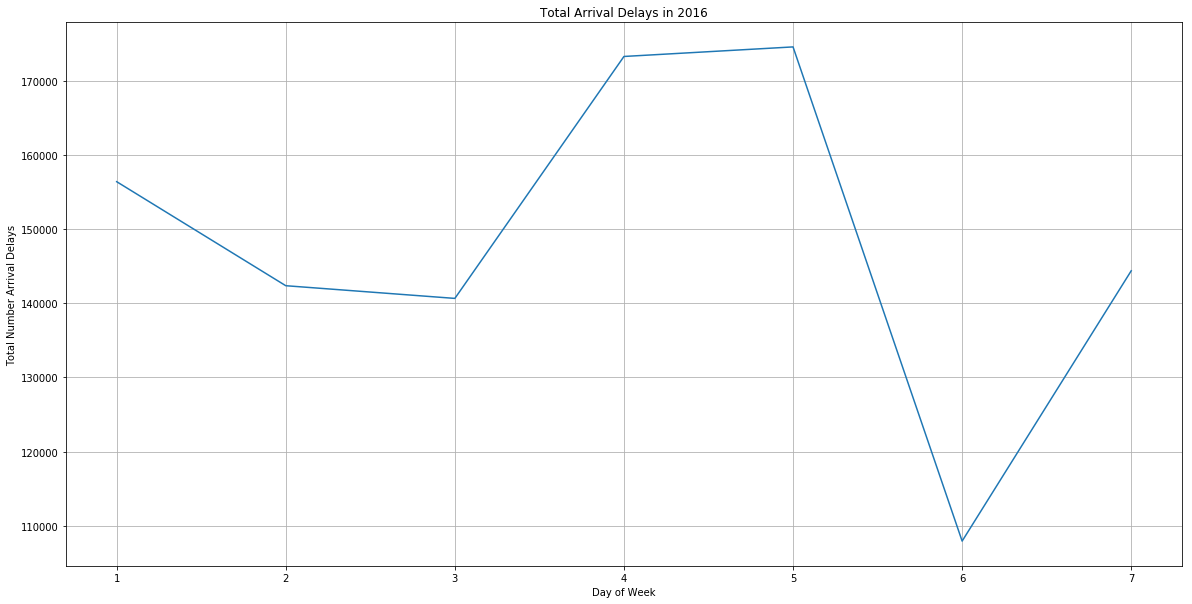

In [16]:
#Plt1.3: Temporal Analysis - Arrival FLight Delays vs Day of Week- Trends on number of delays through the year
plt.figure(figsize=(20,10))
plt.grid(b=True, linestyle='-')  
plt.xlabel("Day of Week")
plt.ylabel("Total Number Arrival Delays")
plt.title("Total Arrival Delays in 2016")
plt.plot(final_arr_delayed_dayofweek ["DAY_OF_WEEK"],final_arr_delayed_dayofweek["FLIGHTS"])
plt.locator_params(axis='x', nbins=7)
plt.show()

In [22]:
#Filtering by diversions
final_diverted = final_csv.loc[final_csv["DIVERTED"] == 1 ,:]
final_diverted["FL_DATE"].head()

#Temporal Analysis
#4.Month vs Diversions
final_diverted_bymonth = final_diverted.groupby("MONTH",as_index=False)
final_diverted_bymonth  = final_diverted_bymonth["FLIGHTS"].count()
final_diverted_bymonth

#Temporal Analysis
#5.Flight Date vs Diversions
final_diverted_bydate = final_diverted.groupby("FL_DATE",as_index=False)
final_diverted_bydate = final_diverted_bydate["FLIGHTS"].count()
final_diverted_bydate.head() 

#Temporal Analysis
#6.Day of week vs Diversions
final_diverted_dayofweek = final_diverted.groupby("DAY_OF_WEEK",as_index=False)
final_diverted_dayofweek  = final_diverted_dayofweek["FLIGHTS"].count()
final_diverted_dayofweek

,DAY_OF_WEEK,FLIGHTS
0,1,2147
1,2,2417
2,3,2226
3,4,2269
4,5,2201
5,6,1679
6,7,2063


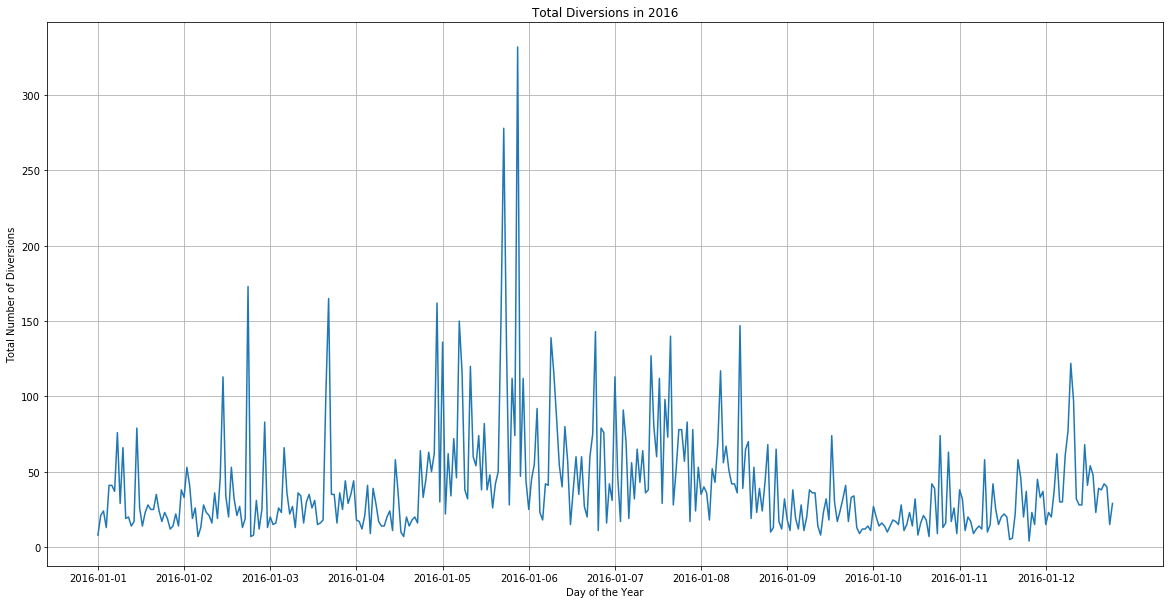

In [23]:
#Plt1.4: Temporal Analysis - Diversions vs Flight Date - Trends on number of diversions through the year
plt.figure(figsize=(20,10))
plt.grid(b=True, linestyle='-')  
plt.xlabel("Day of the Year")
plt.ylabel("Total Number of Diversions")
plt.title("Total Diversions in 2016")
plt.plot(final_diverted_bydate["FL_DATE"],final_diverted_bydate["FLIGHTS"])
plt.locator_params(axis='x', nbins=12)
plt.show()

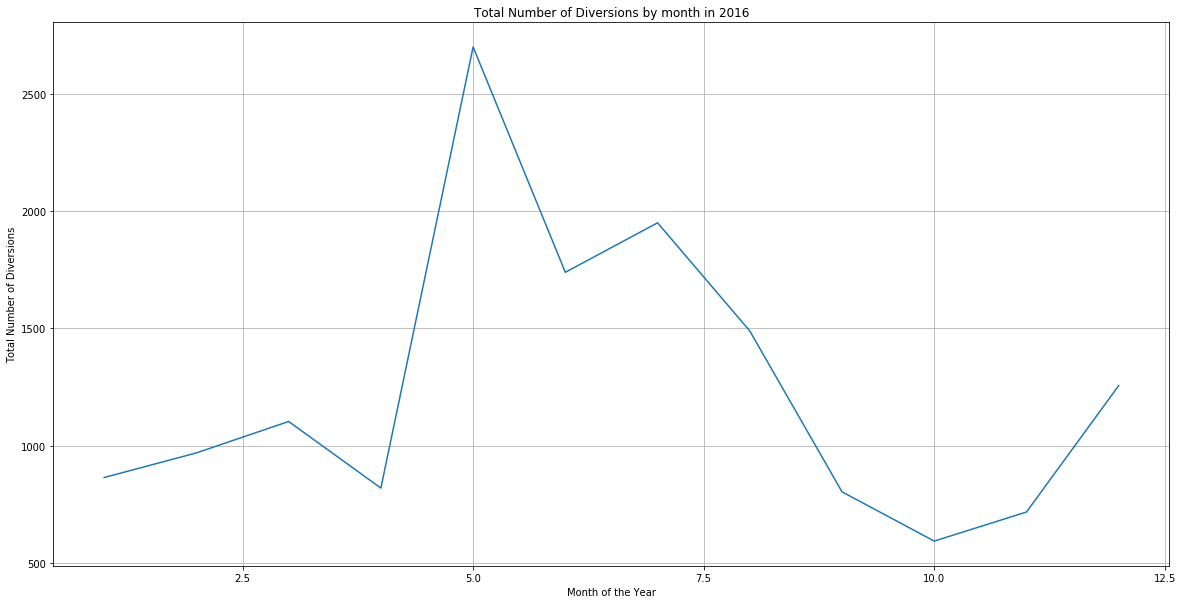

In [24]:
#Plt1.5: Temporal Analysis - Diversions vs Flight Month- Trends on number of diversions through the year
plt.figure(figsize=(20,10))
plt.grid(b=True, linestyle='-')  
plt.xlabel("Month of the Year")
plt.ylabel("Total Number of Diversions")
plt.title("Total Number of Diversions by month in 2016")
plt.plot(final_diverted_bymonth["MONTH"],final_diverted_bymonth["FLIGHTS"])
plt.locator_params(axis='x', nbins=6)
plt.show()

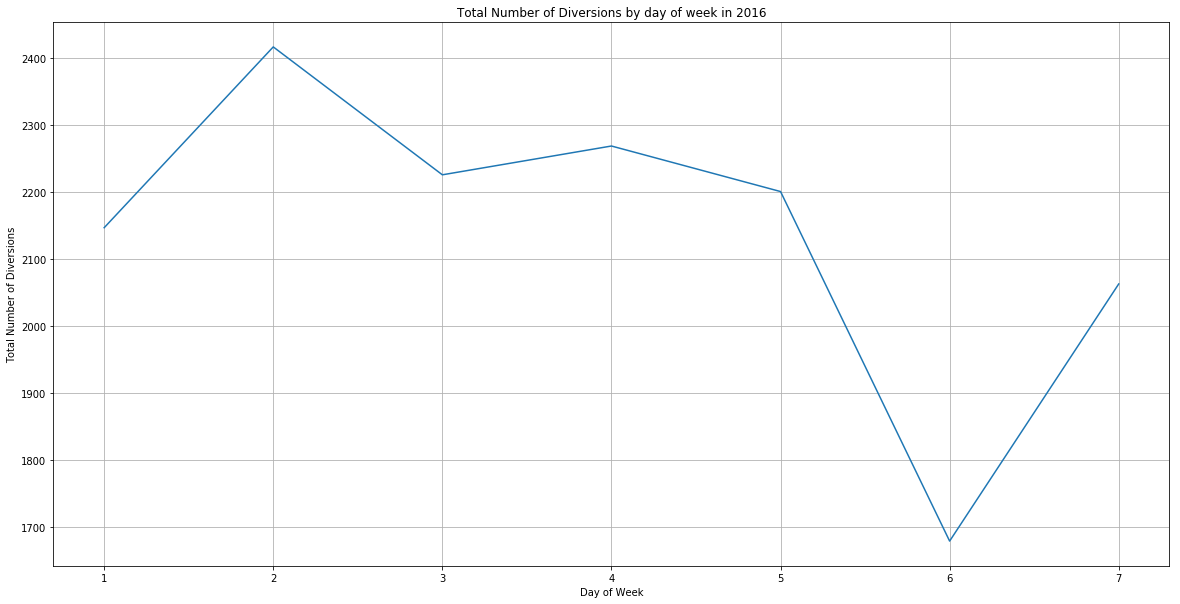

In [25]:
#Plt1.6: Temporal Analysis - Diversions vs Day of Week- Trends on number of diversions through the year
plt.figure(figsize=(20,10))
plt.grid(b=True, linestyle='-')  
plt.xlabel("Day of Week")
plt.ylabel("Total Number of Diversions")
plt.title("Total Number of Diversions by day of week in 2016")
plt.plot(final_diverted_dayofweek ["DAY_OF_WEEK"],final_diverted_dayofweek["FLIGHTS"])
plt.locator_params(axis='x', nbins=7)
plt.show()

In [26]:
#Filtering by diversions
final_cancelled = final_csv.loc[final_csv["CANCELLED"] == 1 ,:]
final_cancelled["FL_DATE"].head()

#Temporal Analysis
#5.Flight Date vs Diversions
final_cancelled_bydate = final_cancelled.groupby("FL_DATE",as_index=False)
final_cancelled_bydate = final_cancelled_bydate["FLIGHTS"].count()
final_cancelled_bydate.head() 


,FL_DATE,FLIGHTS
0,2016-01-01,57
1,2016-01-02,52
2,2016-01-03,97
3,2016-01-04,87
4,2016-01-05,204


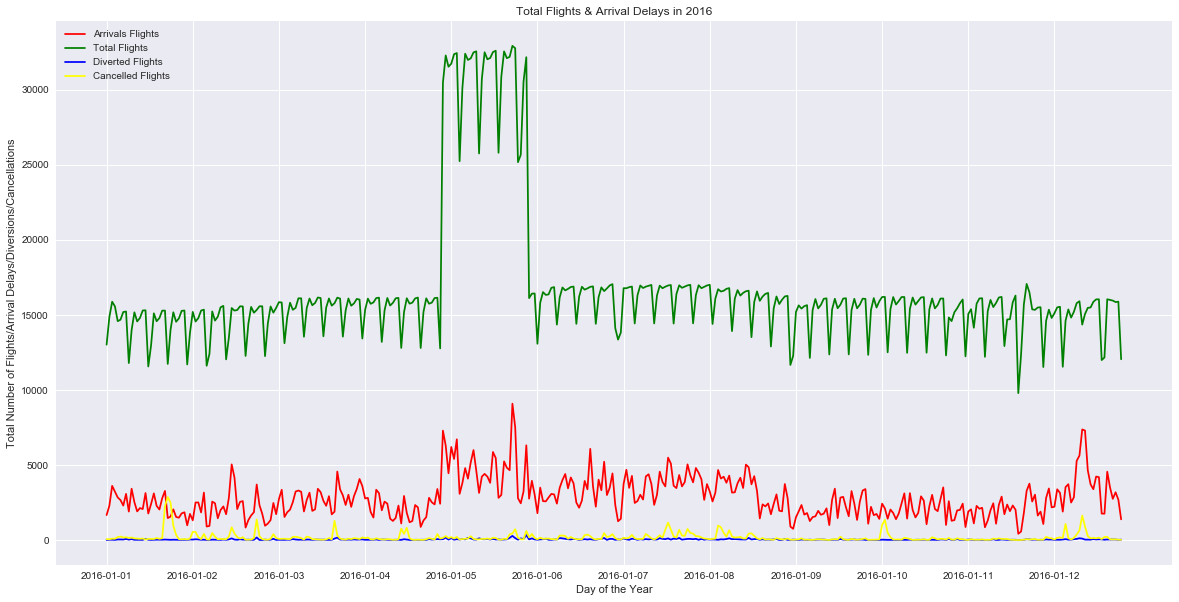

In [30]:
#FinalPlt1: Temporal Analysis - Arrival FLight Delays vs Flight Date - Trends on number of delays through the year
plt.figure(figsize=(20,10))
plt.grid(b=True, linestyle='-')  
plt.xlabel("Day of the Year")
plt.ylabel("Total Number of Flights/Arrival Delays/Diversions/Cancellations")
plt.title("Total Flights & Arrival Delays in 2016")
plt.plot(final_arr_delayed_bydate["FL_DATE"],final_arr_delayed_bydate["FLIGHTS"], color = 'red', label = 'Arrivals Flights')
plt.plot(totflights_bydate["FL_DATE"],totflights_bydate["FLIGHTS"], color = 'green', label = 'Total Flights')
plt.plot(final_diverted_bydate["FL_DATE"],final_diverted_bydate["FLIGHTS"],color = 'blue', label = 'Diverted Flights')
plt.plot(final_cancelled_bydate["FL_DATE"],final_cancelled_bydate["FLIGHTS"], color = 'yellow', label = 'Cancelled Flights')
plt.locator_params(axis='x', nbins=12)
plt.legend(loc='upper left')
sns.set()
plt.show()

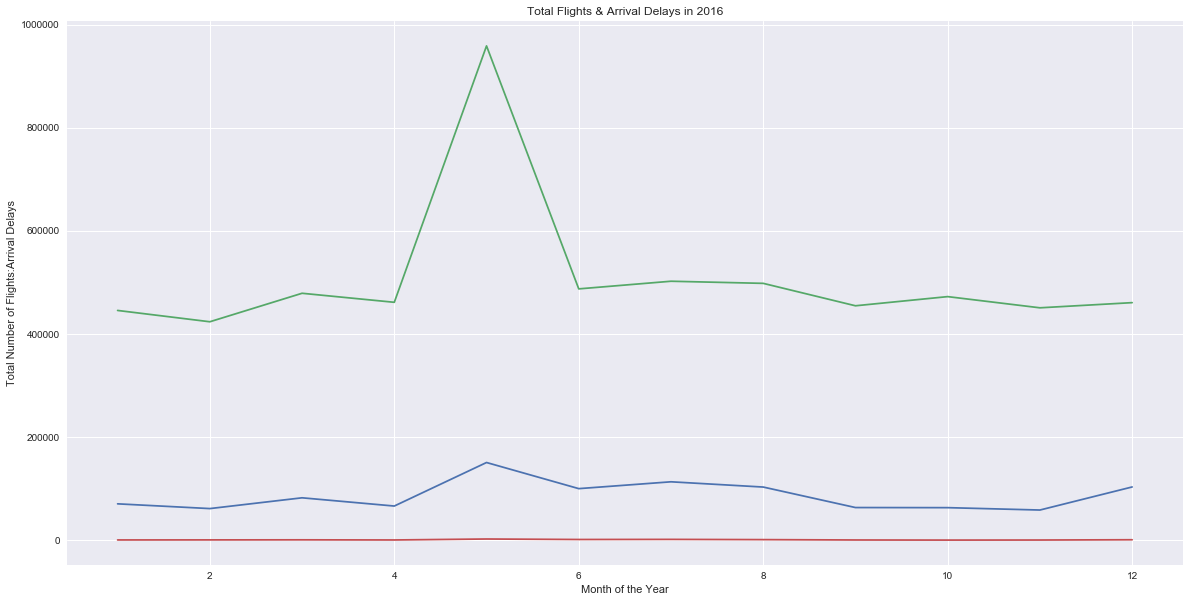

In [32]:
#FinalPlt2: Temporal Analysis - Arrival FLight Delays vs Flight Date - Trends on number of delays through the year
plt.figure(figsize=(20,10))
plt.grid(b=True, linestyle='-')  
plt.xlabel("Month of the Year")
plt.ylabel("Total Number of Flights:Arrival Delays")
plt.title("Total Flights & Arrival Delays in 2016")
plt.plot(final_arr_delayed_bymonth["MONTH"],final_arr_delayed_bymonth["FLIGHTS"])
plt.plot(totflights_bymonth["MONTH"],totflights_bymonth["FLIGHTS"])
plt.plot(final_diverted_bymonth["MONTH"],final_diverted_bymonth["FLIGHTS"])
plt.locator_params(axis='x', nbins=12)
sns.set()
plt.show()

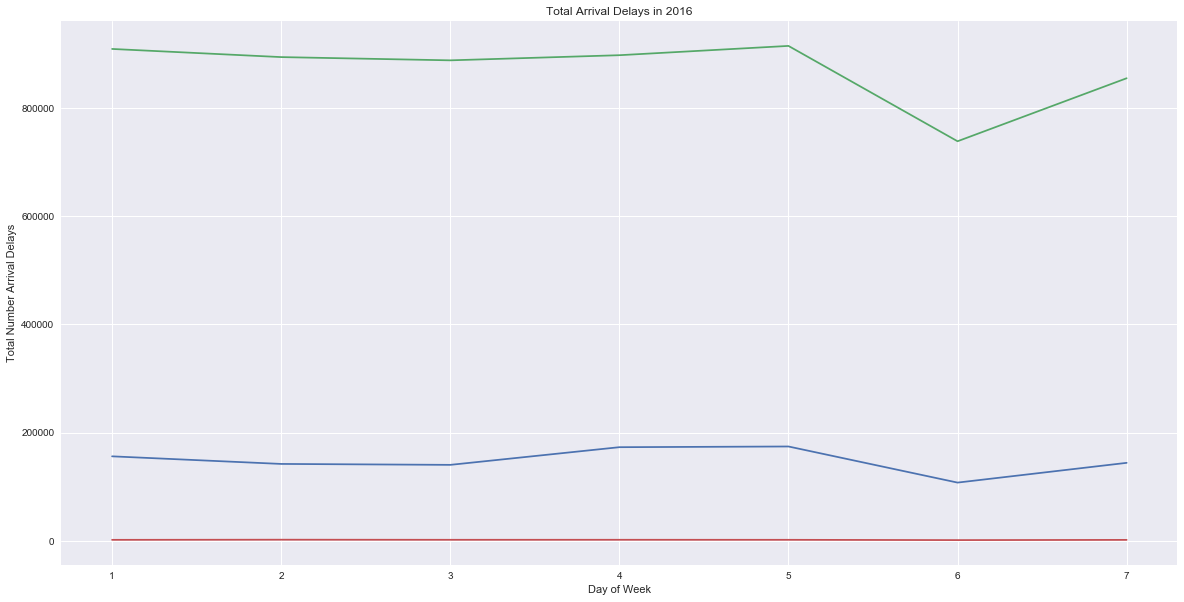

In [33]:
#FinalPlt2: Temporal Analysis - Arrival Flight Delays,total vs Flight Day of Week - Trends on number of delays through diff days of week
plt.figure(figsize=(20,10))
plt.grid(b=True, linestyle='-')  
plt.xlabel("Day of Week")
plt.ylabel("Total Number Arrival Delays")
plt.title("Total Arrival Delays in 2016")
plt.plot(final_arr_delayed_dayofweek["DAY_OF_WEEK"],final_arr_delayed_dayofweek["FLIGHTS"])
plt.plot(totflights_bydayofweek["DAY_OF_WEEK"],totflights_bydayofweek["FLIGHTS"])
plt.plot(final_diverted_dayofweek ["DAY_OF_WEEK"],final_diverted_dayofweek["FLIGHTS"])
plt.locator_params(axis='x', nbins=7)
sns.set()
plt.show()

In [47]:
#Spatial Analysis
#Destnairport vs ArrivalDelay % 
final_arr_delays_bydestnairport = final_arr_delays.groupby("ARR_DELAY_NEW",as_index=False)
final_arr_delays_bydestnairport = final_arr_delays_bydestnairport["FLIGHTS"].count()
final_arr_delays_bydestnairport.head()

,ARR_DELAY_NEW,FLIGHTS
0,15.0,38626
1,16.0,36069
2,17.0,34061
3,18.0,32138
4,19.0,30134


In [48]:
total_delayed_atorigin = final_arr_delays["FLIGHTS"].count()
final_arr_delays_bydestnairport["percentdelays"] = final_arr_delays_bydestnairport["FLIGHTS"]/total_delayed_atorigin * 100
final_arr_delays_bydestnairport.head()

,ARR_DELAY_NEW,FLIGHTS,percentdelays
0,15.0,38626,3.714978
1,16.0,36069,3.469050
2,17.0,34061,3.275925
3,18.0,32138,3.090974
4,19.0,30134,2.898233


In [36]:
#Filtering by departure delays > 15 minutes
final_dep_delays = final_csv.loc[final_csv["DEP_DEL15"] == 1 ,:]
final_dep_delays.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016
5,19790,38.0,1.0,NaN,83.0,1402.0,NaN,0.0,DL,43.0,...,1,0.0,ATL,10397,Atlanta,GA,0.0,DL,0.0,2016
6,19790,37.0,1.0,NaN,74.0,1644.0,NaN,0.0,DL,3.0,...,1,0.0,BNA,10693,Nashville,TN,0.0,DL,0.0,2016
42,19790,129.0,0.0,NaN,2.0,2239.0,NaN,0.0,DL,NaN,...,1,NaN,FLL,11697,Fort Lauderdale,FL,NaN,DL,NaN,2016
45,19790,192.0,1.0,NaN,28.0,1653.0,NaN,0.0,DL,28.0,...,1,0.0,MSP,13487,Minneapolis,MN,0.0,DL,0.0,2016


In [37]:
#Flight delays by carrier
flight_depdel_bycarr = final_dep_delays.groupby("CARRIER",as_index=False)
flight_depdel_bycarr = flight_depdel_bycarr["CARRIER_DELAY"].count()
flight_depdel_bycarr

,CARRIER,CARRIER_DELAY
0,AA,135318
1,AS,14218
2,B6,56914
3,DL,98531
4,EV,73352
5,F9,17672
6,HA,4368
7,NK,28361
8,OO,79321
9,UA,80675


In [38]:
#Flight delays by carrier
total_depdel_bycarr = final_dep_delays.groupby("CARRIER",as_index=False)
total_depdel_bycarr = total_depdel_bycarr["FLIGHTS"].count()
total_depdel_bycarr

,CARRIER,FLIGHTS
0,AA,166503
1,AS,18031
2,B6,71423
3,DL,137622
4,EV,86843
5,F9,21868
6,HA,5108
7,NK,33883
8,OO,94402
9,UA,109609


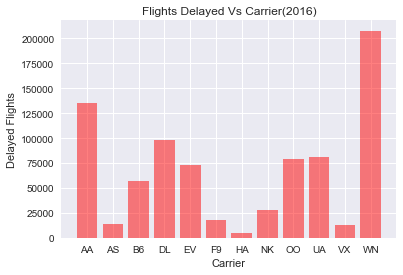

In [39]:
carr_delays = flight_depdel_bycarr["CARRIER_DELAY"]
x_axis = np.arange(len(carr_delays))
plt.bar(x_axis, carr_delays, color='r', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, flight_depdel_bycarr["CARRIER"])
plt.xlabel("Carrier")
plt.ylabel("Delayed Flights")
plt.title("Flights Delayed Vs Carrier(2016)")
plt.legend(loc='upper left')
sns.set()
plt.show()

In [41]:
#Filtering by arrival delays > 15 minutes
final_dep_delays = final_csv.loc[final_csv["DEP_DEL15"] == 1 ,:]
final_dep_delays.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016
5,19790,38.0,1.0,NaN,83.0,1402.0,NaN,0.0,DL,43.0,...,1,0.0,ATL,10397,Atlanta,GA,0.0,DL,0.0,2016
6,19790,37.0,1.0,NaN,74.0,1644.0,NaN,0.0,DL,3.0,...,1,0.0,BNA,10693,Nashville,TN,0.0,DL,0.0,2016
42,19790,129.0,0.0,NaN,2.0,2239.0,NaN,0.0,DL,NaN,...,1,NaN,FLL,11697,Fort Lauderdale,FL,NaN,DL,NaN,2016
45,19790,192.0,1.0,NaN,28.0,1653.0,NaN,0.0,DL,28.0,...,1,0.0,MSP,13487,Minneapolis,MN,0.0,DL,0.0,2016


In [40]:
final_dep_delays["DELAY_REASON"]= ""

C:\Users\sujat\Anaconda3\envs\Pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
final_dep_delays.columns

Index(['AIRLINE_ID', 'AIR_TIME', 'ARR_DEL15', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ARR_TIME', 'CANCELLATION_CODE', 'CANCELLED', 'CARRIER',
       'CARRIER_DELAY', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'DAY_OF_MONTH',
       'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_TIME',
       'DEST', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DISTANCE', 'DIVERTED', 'DIV_ACTUAL_ELAPSED_TIME',
       'DIV_AIRPORT_LANDINGS', 'DIV_ARR_DELAY', 'DIV_REACHED_DEST', 'FLIGHTS',
       'FL_DATE', 'FL_NUM', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'NAS_DELAY',
       'ORIGIN', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'SECURITY_DELAY', 'UNIQUE_CARRIER', 'WEATHER_DELAY', 'YEAR',
       'DELAY_REASON'],
      dtype='object')

In [41]:
final_dep_delays["WEATHER_DELAY"].head()

4     0.0
5     0.0
6     0.0
42    NaN
45    0.0
Name: WEATHER_DELAY, dtype: float64

In [42]:
def determine_delay_reason(CARRIER_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY,NAS_DELAY):
    if CARRIER_DELAY != "NaN" and CARRIER_DELAY != "" and CARRIER_DELAY != 0.0:
        delay_reason = "CD"
    elif LATE_AIRCRAFT_DELAY != "NaN" and LATE_AIRCRAFT_DELAY != "" and LATE_AIRCRAFT_DELAY != 0.0:
        delay_reason = "LA"
    elif SECURITY_DELAY != "NaN" and SECURITY_DELAY != "" and SECURITY_DELAY != 0.0:
        delay_reason = "SD"
    elif NAS_DELAY != "NaN" and NAS_DELAY != "" and NAS_DELAY != 0.0: 
        delay_reason = "NAS"
    else:
        delay_reason = "NA"
    return delay_reason

In [43]:
for index, row in final_dep_delays.iterrows():
    delay_reason1 = determine_delay_reason(row["CARRIER_DELAY"],row["LATE_AIRCRAFT_DELAY"],row["SECURITY_DELAY"],row["NAS_DELAY"])
    final_dep_delays.set_value(index, "DELAY_REASON", delay_reason1)

In [44]:
final_dep_delays.DELAY_REASON.unique()

array(['CD', 'NA', 'LA', 'NAS', 'SD'], dtype=object)

In [45]:
final_dep_delays_bydelaycodemonth = final_dep_delays.groupby(["DELAY_REASON","MONTH",],as_index=False)
final_dep_delays_bydelaycodemonth = final_dep_delays_bydelaycodemonth["FLIGHTS"].count()
final_dep_delays_bydelaycodemonth.head()

,DELAY_REASON,MONTH,FLIGHTS
0,CD,1,50384
1,CD,2,41759
2,CD,3,51633
3,CD,4,45466
4,CD,5,102102


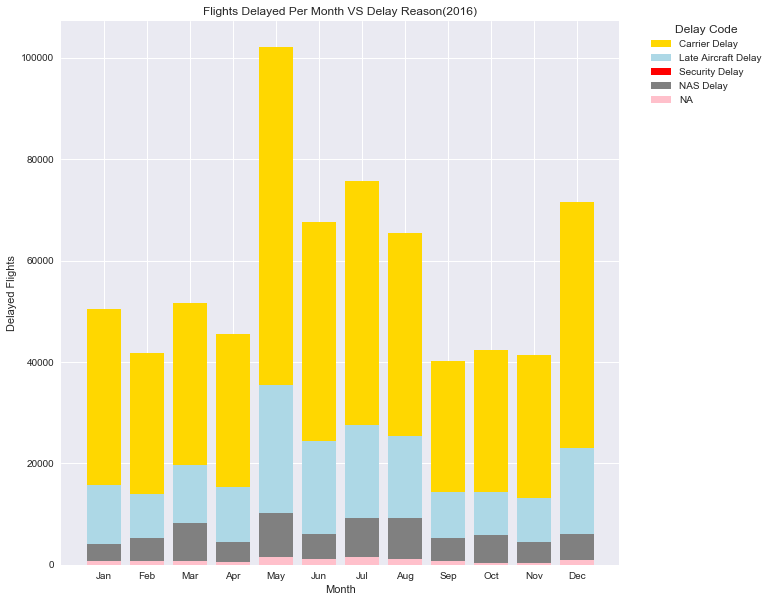

In [46]:
dfdaymonths = final_dep_delays_bydelaycodemonth
plt.figure(figsize=(10,10))
dfa = dfdaymonths[dfdaymonths['DELAY_REASON']=="CD"]
dfb = dfdaymonths[dfdaymonths['DELAY_REASON']== "LA"]
dfc = dfdaymonths[dfdaymonths['DELAY_REASON']=="SD"]
dfd = dfdaymonths[dfdaymonths['DELAY_REASON']=="NAS"]
dfe = dfdaymonths[dfdaymonths['DELAY_REASON']=="NA"]
pa = plt.bar(dfa.MONTH, dfa.FLIGHTS, color = 'gold', label ='Carrier Delay')
pb = plt.bar(dfb.MONTH, dfb.FLIGHTS, color = 'lightblue', label ='Late Aircraft Delay')
pc = plt.bar(dfc.MONTH, dfc.FLIGHTS, color = 'red', label ='Security Delay')
pd = plt.bar(dfd.MONTH, dfd.FLIGHTS, color = 'gray', label ='NAS Delay')
pe = plt.bar(dfe.MONTH, dfe.FLIGHTS, color = 'pink', label ='NA' )
plt.xticks(np.arange(1,13),("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"))
plt.xlabel("Month")
plt.ylabel("Delayed Flights")
plt.title("Flights Delayed Per Month VS Delay Reason(2016)")
plt.legend(loc='upper left')
plt.legend (loc=2,
           borderaxespad=0.,
           bbox_to_anchor=(1.05, 1),
           fontsize=10,
           title='Delay Code')
sns.set()
plt.show()